<a href="https://colab.research.google.com/github/honghyun-kim/Public_test_/blob/main/LG_Deep_Learning_%EC%8B%A4%EC%8A%B51%EC%A3%BC%EC%B0%A8_02(%EB%B0%B0%ED%8F%AC%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://bit.ly/3jVS1V2

# https://bit.ly/3z4pwZj


# 시작하기 전에...
* 파일-드라이브에 사본 저장 

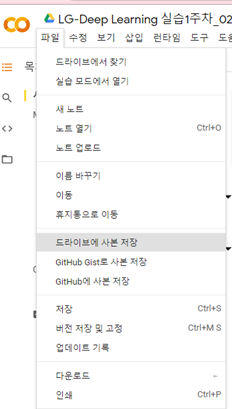


# MNIST Classification




## MNIST란?
* 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
* 28x28 픽셀 이미지
* 60000개의 Training 이미지와 10000개의 Test 이미지로 구성
![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbZF8Dg%2FbtqHLYfuBGW%2FpZIRlQaSkOzY4NFfbF5vCK%2Fimg.png)

### MNIST dataset download

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
# 내장된 MNIST dataset download
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#shape 확인
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


* 그래프 관련 라이브러리인 matplotlib을 import 합니다.

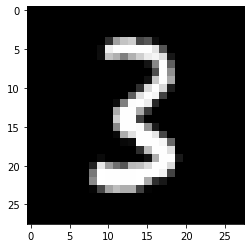

3


In [ ]:
#matplotlib 라이브러리 가져오기
import matplotlib.pyplot as plt

#이미지 확인하기
plt.imshow(train_images[50000], cmap='gray')
plt.show()
print(train_labels[50000])

In [ ]:
#numpy 라이브러리 가져오기
import numpy as np

#픽셀의 최대값, 최소값 확인
print(np.max(train_images))
print(np.min(train_images))

255
0


* 픽셀 값을 0~1 사이로 정규화합니다.

In [ ]:
#normalize
train_images, test_images = train_images/255.0 , test_images/255.0

* np.max와 np.min 함수를 사용하여 정규화 결과를 확인합니다.

In [ ]:
print(np.max(train_images))
print(np.min(train_images))

1.0
0.0


###모델 구조 설정

* layer1 : 입력 이미지의 크기가 28×28이므로 이를 1-D Tensor로 펼칩니다. 
* layer2 : layer1에서 출력되는 784 개의 값(28×28)을 입력받아 32개의 값으로 인코딩해 주는데, 활성함수로 ReLU를 사용합니다. 2번째 레이어의 실제 연산은 1번째 레이어에서 제공받은 784개의 값을 784×32 행렬과 곱하고 bias 값을 더하여 얻은 32개의 출력값을 다시 ReLU 함수에 입력해 얻은 32개의 출력입니다.
* layer3 : layer2에서 제공되는 32 개의 값을 입력받아 64개의 값으로 인코딩해 주는데, 활성함수로 ReLU를 사용합니다. 3번째 레이어의 실제 연산은 2번째 레이어에서 제공받은 32개의 값을 64×32 행렬과 곱하고 bias 값을 더하여 얻은 64개의 출력값을 다시 ReLU 함수에 입력해 얻은 64개의 출력입니다. 
* Dropout : 64개의 뉴런 중 무작위로 20%의 노드를 다음 레이어의 입력에서 무시합니다. 
* layer4 : 활성함수 softmax를 사용하여 10개(0~9)의 값을 확률 값을 출력합니다.
* softmax 함수: 다중 분류에 사용되는 함수로 모든 입력값의 합이 1이 되도록 합니다.
![이미지](https://blog.kakaocdn.net/dn/dktxrm/btqy8gbvFty/yJZYlEU7jvZhsouKkFWWM1/img.png)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu', use_bias=True),
    Dense(64, activation='relu', use_bias=True),
    Dropout(0.2),
    Dense(10, activation='softmax', use_bias=True)
])

* loss function : 머신러닝 모델의 출력값과 실제 ground-truth의 차이를 신경망이 학습할 수 있도록 해주는 함수
* optimizer : loss function의 minima를 빠르고 안정적으로 찾을 수 있도록 하는 방법
* sparse_categorical_crossentropy : 다중 분류 손실함수. one-hot encoding을 할 필요가 없음. (one-hot encoding을 했을 경우에는 categorical_crossentropy사용)
* metrics : 학습이 잘 되고 있는지 판단하는 평가 지표

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

### 모델 학습

In [ ]:
model.fit(____________, _____________, epochs=_______)

### 모델 구조 다르게 설정

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    _____________________________
    _____________________________
    _____________________________
])

In [ ]:

model.compile(optimizer=____,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

### 학습

In [ ]:
model.fit(____________________)

### 예측함수 설정
* input shape 과 맞춰주기 위해 Image를 reshape합니다.
* model.predict 함수를 이용하여 0~9의 클래스에 해당하는 확률값을 예측합니다.
* np.argmax 함수를 이용하여 확률이 최대가 되는 지점의 인덱스 값을 출력합니다.
* np.max 함수를 이용하여 최대 예측 확률값을 출력합니다.

In [ ]:
def pred(img):
  image=img.reshape(-1,28,28)
  prob=model.predict(image)
  pred_label=np.argmax(_____)
  pred_prob=np.max(_____)  
  print(f'예측 label : {pred_label}, 예측 확률 : {pred_prob:.4f}')


In [ ]:
plt.imshow(test_images[88], cmap='gray')
plt.show()

In [ ]:
pred(test_images[88])

# Cat vs Dog Classification
![이미지](https://miro.medium.com/max/1400/1*EvMbMNRHm_aOf1n4tDO1Xg.jpeg)

### dataset download

In [ ]:
# 현재 작업공간의 폴더 제거
!rm -rf *

In [ ]:
!wget https://github.com/soribido/catvsdog/raw/main/catdog.zip
!wget https://github.com/soribido/catvsdog/raw/main/catdogtest.zip
!wget https://github.com/soribido/catvsdog/raw/main/catdog4000.zip

In [ ]:
# 파일 확인
!ls

In [ ]:
!unzip catdog.zip 
!unzip catdogtest.zip
!unzip catdog4000.zip

In [ ]:
#경로 설정
import os
trainpath = './catdog4000/'
testpath = './catdogtest/'

trainlist = os.listdir(trainpath)
testlist = os.listdir(testpath)

In [ ]:
print(len(trainlist))

In [ ]:
trainlist[:10]

* opencv 라이브러리는 이미지 처리에 많이 이용됩니다. 

In [ ]:
#라이브러리 불러오기
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
for i in range(9):
  test = cv2.imread(trainpath+trainlist[i])
  test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB) 
  plt.subplot(3,3,i+1)
  plt.imshow(test)
plt.show()  

### 라벨 만들기

In [ ]:
train_label=[]
for name in trainlist:
  category=name.split(__________)[0]
  if category=="cat":
    train_label.append(0)
  else:
    train_label.append(1)     

In [ ]:
train_label=np.array(train_label)

In [ ]:
train_label.shape

# 새 섹션

### RGB Image 전처리

* 64x64x3 의 RGB이미지를 fully-connected layer가 학습할 수 있도록 형태를 맞춰줍니다.

In [ ]:
count=0
for i in range(len(trainlist)):
  
  img = cv2.imread(trainpath+trainlist[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img, (64,64))
  img_ravel = img_resize.ravel()
  img_reshape = img_ravel.reshape(-1,64,64,3)
  count+=1
  if count <= 1:
    train_img = img_reshape
  else:
    train_img = np.vstack((train_img, img_reshape))

In [ ]:
train_img=train_img/________   

In [ ]:
train_img.shape

(4000, 64, 64, 3)

In [ ]:
plt.imshow(train_img[0])

In [ ]:
for i in range(5):
  plt.imshow(train_img[i])
  plt.show()
  print(f'label:{train_label[i]}')

### Train/Validation Set 분할
* 모델이 잘 학습하고 있는지 확인하기 위해 train set과 validation set을 분할합니다.

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_img, train_label, test_size=0.2, stratify=train_label)

In [ ]:
print(train_images.shape, test_images.shape)
print(np.sum(train_labels), np.sum(test_labels))

### 모델 구조 설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
model = Sequential([
    __________________________________________
    __________________________________________
    __________________________________________
    Dense(_____, activation=___________, use_bias=True)
])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp=ModelCheckpoint('bestmodel.h5', save_best_only=True, monitor='val_loss')

In [ ]:
model.compile(optimizer=______________,
              loss=___________________________,
              metrics=['accuracy'])
model.summary()

### 학습

In [ ]:
history=model.fit(train_images,train_labels, validation_data=(______________ , _____________), epochs=50, callbacks=mcp)

### 학습 결과 그래프로 확인

In [ ]:
historyDict=history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epo = range(1, len(acc)+1)
plt.plot(epo, loss, 'b', label="Traing loss")
plt.plot(epo, val_loss, 'r', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epo, acc, 'b', label="Traing accuracy")
plt.plot(epo, val_acc, 'r', label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 예측함수 설정




* validation loss 가 가장 낮았던 모델을 불러옵니다.

In [ ]:
model = tf.keras.models.load_model('./bestmodel.h5')

In [ ]:
def prob():
  count = 0
  for i in range(len(test_images)):
      img_reshape= test_images[i].reshape(-1,______________)
      prob = model.predict(img_reshape)
      if np.argmax(prob)==test_labels[i]:
        count+=1
  print(count/len(test_images))      

In [ ]:
prob()

In [ ]:
model.evaluate()

In [ ]:
def predict(imgnumber):
  img_reshape= test_images[imgnumber].reshape(-1,__________)
  prob = model.predict(img_reshape)
  plt.imshow(test_images[imgnumber])
  if test_labels[imgnumber]==0:
    plt.title('real : cat', fontsize=15)
  else:
    plt.title('real : dog', fontsize=15)
  if ____________==0:
    plt.xlabel('predict : cat',fontsize=15)
  else:
    plt.xlabel('predict : dog',fontsize=15)
  plt.show()  

In [ ]:
for i in range(50,60):
  predict(i)